Let's do some EDA on Health Nutrition and Population Statistics. The dataset is more fully described on Kaggle, and can be found [here](https://www.kaggle.com/theworldbank/health-nutrition-and-population-statistics).

In [1]:
# start with some basic imports
import numpy as np
import pandas as pd

In [2]:
# read and assign csv file to 'health_df'
health_df = pd.read_csv('../data/health_nutrition_population_statistics.csv')

In [3]:
# return no. of rows and columns
health_df.shape

(89010, 61)

In [4]:
# return dataframe info (non-null value count & dtype)
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89010 entries, 0 to 89009
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    89010 non-null  object 
 1   Country Code    89010 non-null  object 
 2   Indicator Name  89010 non-null  object 
 3   Indicator Code  89010 non-null  object 
 4   1960            35482 non-null  float64
 5   1961            35325 non-null  float64
 6   1962            35889 non-null  float64
 7   1963            35452 non-null  float64
 8   1964            35483 non-null  float64
 9   1965            35603 non-null  float64
 10  1966            35538 non-null  float64
 11  1967            36022 non-null  float64
 12  1968            35577 non-null  float64
 13  1969            35630 non-null  float64
 14  1970            36910 non-null  float64
 15  1971            37578 non-null  float64
 16  1972            38015 non-null  float64
 17  1973            37542 non-null 

Looks like its a dataset of countries, indicator names, and years from 1960 - 2015. Let's dive a little deeper and determine the unique values for 'Country Name' and 'Indicator Name'. Note, column '60' has no values.

In [5]:
# drop column with no objects/values
health_df.drop(columns = 'Unnamed: 60', inplace=True)
health_df.shape

(89010, 60)

In [6]:
# how many unique values in the 'Country Name' column?
len(health_df['Country Name'].unique())

258

In [7]:
# how many unique values in the 'Indicator Name' column?
len(health_df['Indicator Name'].unique())

345

In [8]:
# what type of data is in the 'Indicator Name' column?
health_df['Indicator Name'].unique()[:10]

array(['% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
       '% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Adults (ages 15+) and children (0-14 years) living with HIV',
       'Adults (ages 15+) and children (ages 0-14) newly infected with HIV',
       'Adults (ages 15+) living with HIV',
       'Adults (ages 15+) newly infected with HIV',
       'Age at first marriage, female', 'Age at first marriage, male',
       'Age dependency ratio (% of working-age population)'], dtype=object)

Not surprisingly, various health & population statistics. Let's filter the 'Country Name' with 'United States'.

In [9]:
# return a dataframe where 'Country Name' == 'United States'
usa_df = health_df[health_df['Country Name'] == 'United States']
usa_df.shape

(345, 60)

In [10]:
usa_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
85215,United States,USA,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85216,United States,USA,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85217,United States,USA,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,84.9872,82.7346,80.482,77.9506,75.4192,72.8878,...,40.3754,39.669,37.7398,35.8106,33.8814,31.9522,30.023,27.0666,24.1102,NaN
85218,United States,USA,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85219,United States,USA,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's clean up the index, just in case.

In [11]:
# reset index
usa_df.reset_index(drop=True, inplace=True)
usa_df.index

RangeIndex(start=0, stop=345, step=1)

In [12]:
# return `usa_df` info
usa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 60 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    345 non-null    object 
 1   Country Code    345 non-null    object 
 2   Indicator Name  345 non-null    object 
 3   Indicator Code  345 non-null    object 
 4   1960            170 non-null    float64
 5   1961            168 non-null    float64
 6   1962            171 non-null    float64
 7   1963            169 non-null    float64
 8   1964            169 non-null    float64
 9   1965            171 non-null    float64
 10  1966            169 non-null    float64
 11  1967            171 non-null    float64
 12  1968            169 non-null    float64
 13  1969            173 non-null    float64
 14  1970            174 non-null    float64
 15  1971            174 non-null    float64
 16  1972            178 non-null    float64
 17  1973            174 non-null    flo

Looks like there's some missing data that we'll need to deal with later. In the meantime, let's revisit 'Indicator Name'.

In [13]:
usa_df['Indicator Name'].unique()

array(['% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
       '% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Adults (ages 15+) and children (0-14 years) living with HIV',
       'Adults (ages 15+) and children (ages 0-14) newly infected with HIV',
       'Adults (ages 15+) living with HIV',
       'Adults (ages 15+) newly infected with HIV',
       'Age at first marriage, female', 'Age at first marriage, male',
       'Age dependency ratio (% of working-age population)',
       'Age dependency ratio, old', 'Age dependency ratio, young',
       'Age population, age 0, female, interpolated',
       'Age population, age 0, male, interpolated',
       'Age population, age 01, female, interpolated',
       'Age population, age 01, male, interpolated',
       'Age popula

What types of 'Indicator Names' would be interesting to compare against? Let's start with 'Birth Rate' and go from there.

In [14]:
# return a dataframe where 'Indicator Name' == 'Birth rate, crude (per 1,000 people)'
us_birth_rate = usa_df[usa_df['Indicator Name'] == 'Birth rate, crude (per 1,000 people)']
us_birth_rate

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
68,United States,USA,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,23.7,23.3,22.4,21.7,21.1,19.4,...,14.3,14.3,14.0,13.5,13.0,12.7,12.6,12.4,12.5,NaN


In [15]:
type(us_birth_rate)

pandas.core.frame.DataFrame

In [16]:
us_birth_rate.shape

(1, 60)

Looks like there is at least one NaN value. Let's check the DataFrame (by column) if there are more missing values before we try plotting.

In [17]:
# check for NaN values and sum by column
us_birth_rate.isna().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
1961              0
1962              0
1963              0
1964              0
1965              0
1966              0
1967              0
1968              0
1969              0
1970              0
1971              0
1972              0
1973              0
1974              0
1975              0
1976              0
1977              0
1978              0
1979              0
1980              0
1981              0
1982              0
1983              0
1984              0
1985              0
1986              0
1987              0
1988              0
1989              0
1990              0
1991              0
1992              0
1993              0
1994              0
1995              0
1996              0
1997              0
1998              0
1999              0
2000              0
2001              0
2002              0
2003              0
2004              0
2005              0


There's just the one NaN value for '2015'. This shouldn't impact our plot much.

<Axes: >

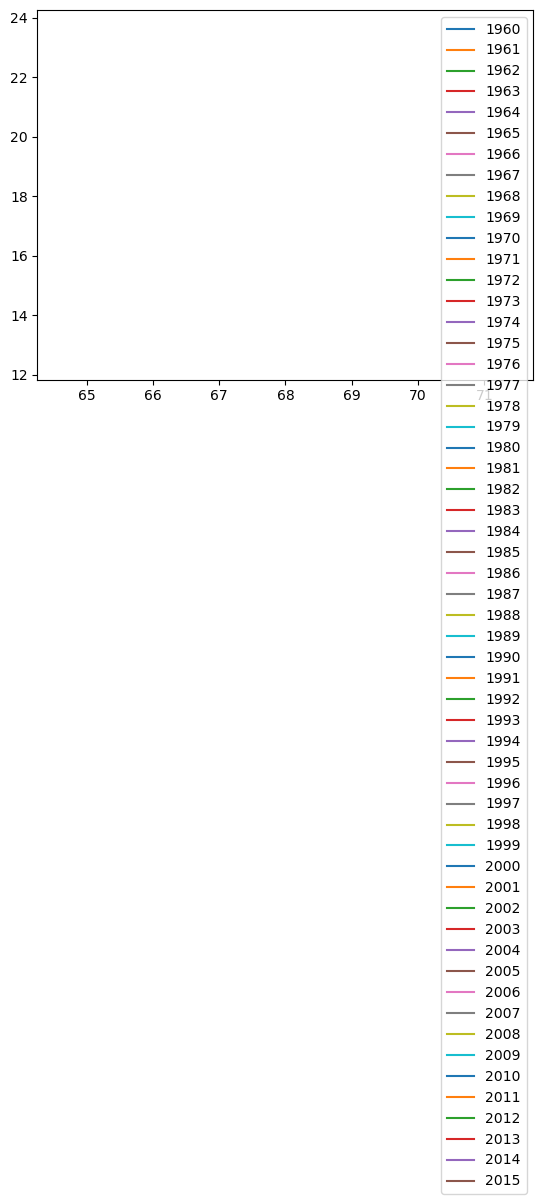

In [18]:
us_birth_rate.plot()

Hmmm....that's not what we expected. There's a "line" for eadh year. What we want is for years to be on the x-axis and the corresponding values on the y-axis. What if we slice the data to return the years and their corresponding values?

In [19]:
# return all columns, beginning with the 4th indexed column, from the zero indexed row
us_birth_rate.iloc[0,4:].head()

1960    23.7
1961    23.3
1962    22.4
1963    21.7
1964    21.1
Name: 68, dtype: object

In [20]:
type(us_birth_rate.iloc[0,4:])

pandas.core.series.Series

In [21]:
us_birth_rate.iloc[0,4:].shape

(56,)

In [22]:
us_birth_rate.iloc[0,4:].index

Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015'],
      dtype='object')

Great! Now let's try using `.plot()` on the Series

<Axes: >

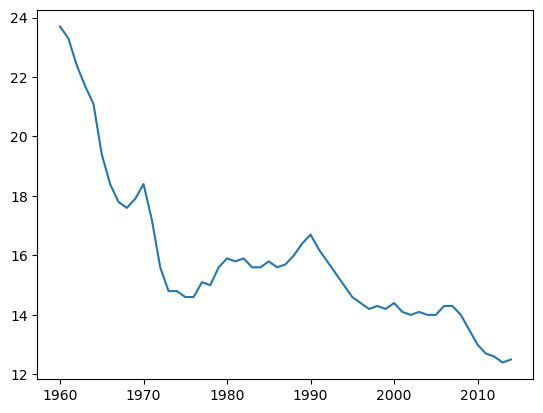

In [23]:
us_birth_rate.iloc[0,4:].plot()

Niceeee! Looks like `.plot()`, by default, will assign index values on the x-axis. Good to know!

Now let's revisit `us_bith_rate`.

In [24]:
us_birth_rate

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
68,United States,USA,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,23.7,23.3,22.4,21.7,21.1,19.4,...,14.3,14.3,14.0,13.5,13.0,12.7,12.6,12.4,12.5,NaN


What would if we transpose the DataFrame so that the years are indexed as rows, and then use `.plot()` + `.iloc`?

In [25]:
us_birth_rate.transpose().head(10)

,68
Country Name,United States
Country Code,USA
Indicator Name,"Birth rate, crude (per 1,000 people)"
Indicator Code,SP.DYN.CBRT.IN
1960,23.7
1961,23.3
1962,22.4
1963,21.7
1964,21.1
1965,19.4


In [26]:
us_birth_rate.transpose().shape

(60, 1)

<Axes: >

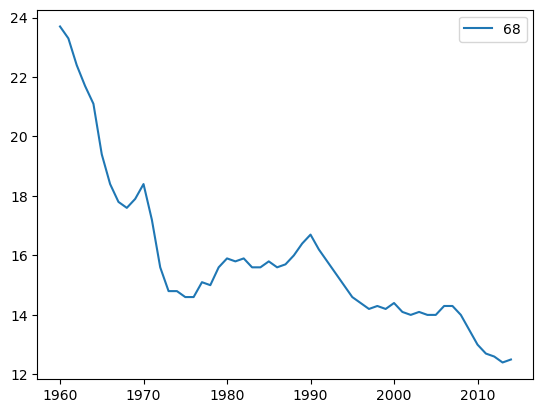

In [27]:
us_birth_rate.transpose().iloc[4:].plot()

Awesome! However, `.plot()` has assigned the column name '68' as the name of our line. Let's rename that to our desired column name using `.rename()`.

In [28]:
us_birth_rate.transpose().iloc[4:].head()

,68
1960,23.7
1961,23.3
1962,22.4
1963,21.7
1964,21.1


In [29]:
us_birth_rate.transpose().iloc[4:].rename(columns={68:'Birth rate, crude (per 1,000 people)'}).head()

,"Birth rate, crude (per 1,000 people)"
1960,23.7
1961,23.3
1962,22.4
1963,21.7
1964,21.1


Now let's try plotting again using `.plot()`.

<Axes: >

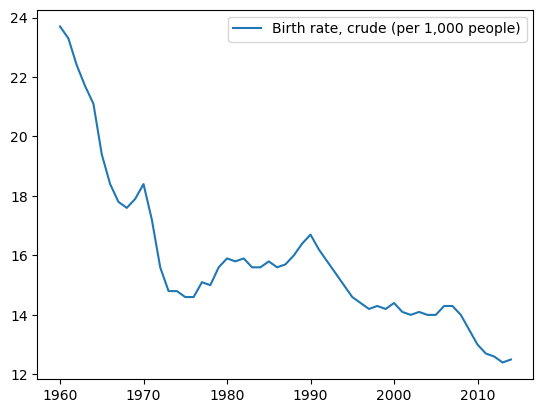

In [30]:
us_birth_rate.transpose().iloc[4:].rename(columns={68:'Birth rate, crude (per 1,000 people)'}).plot()

There we go! Using `.plot()` on a Series is the way to go. It looks like we can also `.transpose()` and slice a DataFrame, and use `.rename()` to rename the column (line), despite it requiring more code. 

There are many ways to return the same desired output. For example, we could have instead used `.set_index()`, `.rename_axis()`, `.drop()`, and `.transpose()` to return our desired DataFrame or Series, prior to applying `.plot()`. See below:

In [31]:
us_birth_rate.set_index('Indicator Name').rename_axis(None).drop(columns=['Country Name', 'Country Code', 'Indicator Code']).transpose().head()

,"Birth rate, crude (per 1,000 people)"
1960,23.7
1961,23.3
1962,22.4
1963,21.7
1964,21.1


Anyway, you get it. Using Pandas `.plot()` is a fast and effective way to visualize our data. But what if we wanted more flexibility, such as the ability to add a titel, control line styles, labels, etc? Enter, Matplotlib.

Matplotlib's module, `Pyplot`, provides a simple and intuitive interface for creating visualizations in Python. Let's start with plotting `us_birth_rate` with `plt`.

In [32]:
import matplotlib.pyplot as plt

In [33]:
us_birth_rate

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
68,United States,USA,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,23.7,23.3,22.4,21.7,21.1,19.4,...,14.3,14.3,14.0,13.5,13.0,12.7,12.6,12.4,12.5,NaN


Let's slice the DataFrame to return only the years.

In [34]:
us_birth_rate.iloc[0, 4:].head()

1960    23.7
1961    23.3
1962    22.4
1963    21.7
1964    21.1
Name: 68, dtype: object

In [35]:
type(us_birth_rate.iloc[0, 4:])

pandas.core.series.Series

In [36]:
# prep x-values using `np.linspace()`
np.linspace(1960, 2015, 56)

array([1960., 1961., 1962., 1963., 1964., 1965., 1966., 1967., 1968.,
       1969., 1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977.,
       1978., 1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986.,
       1987., 1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995.,
       1996., 1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004.,
       2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013.,
       2014., 2015.])

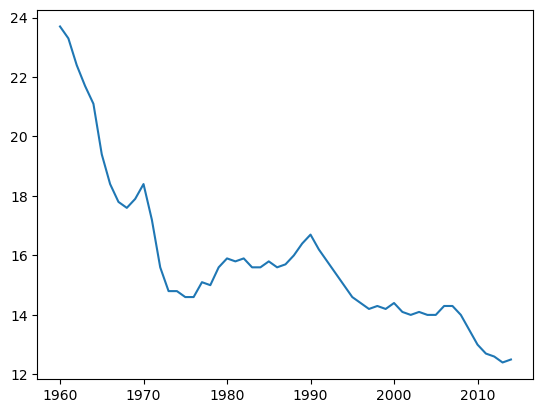

In [37]:
# combine with our y-values (sliced DataFrame containing only years)
plt.plot(np.linspace(1960,2015,56), us_birth_rate.iloc[0, 4:])
plt.show()

That was simple, similar to Pandas `.plot()`. But unlike `.plot()`, `plt` allows us to further customize our plots. See below:

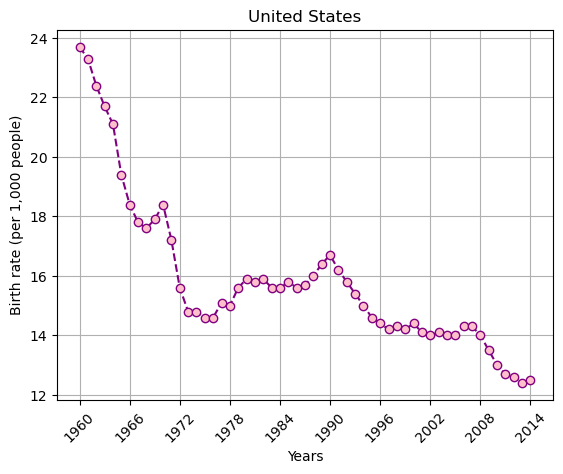

In [38]:
plt.style.use('default')

plt.plot(np.linspace(1960,2015,56), us_birth_rate.iloc[0,4:], color='purple', marker='o', mfc='pink', linestyle = 'dashed')
plt.title('United States')
plt.xlabel('Years')
plt.xticks(range(1960,2016,6), rotation=45)
plt.ylabel('Birth rate (per 1,000 people)')

plt.grid()
# plt.show()

plt.savefig('../images/us_birth_rate.png')

Fancy, huh?

Let's plot for other 'Indicator Name' values that we think reveal a compelling story.

In [39]:
# return a dataframe where 'Indicator Name' == 'Death rate, crude (per 1,000 people)'
us_death_rate = usa_df[usa_df['Indicator Name'] == 'Death rate, crude (per 1,000 people)']
us_death_rate

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
91,United States,USA,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,9.5,9.3,9.5,9.6,9.4,9.4,...,8.1,8.0,8.1,7.9,8.0,8.1,8.1,8.1,8.1,NaN


In [40]:
# check for NaN values and sum by column
us_death_rate.isna().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
1961              0
1962              0
1963              0
1964              0
1965              0
1966              0
1967              0
1968              0
1969              0
1970              0
1971              0
1972              0
1973              0
1974              0
1975              0
1976              0
1977              0
1978              0
1979              0
1980              0
1981              0
1982              0
1983              0
1984              0
1985              0
1986              0
1987              0
1988              0
1989              0
1990              0
1991              0
1992              0
1993              0
1994              0
1995              0
1996              0
1997              0
1998              0
1999              0
2000              0
2001              0
2002              0
2003              0
2004              0
2005              0


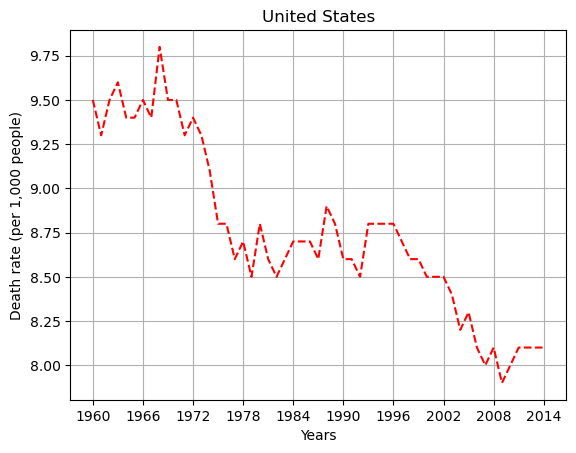

In [41]:
# plot `us_death_rate`
plt.plot(np.linspace(1960,2015,56), us_death_rate.iloc[0,4:], color='red', linestyle = 'dashed')
plt.title('United States')
plt.xlabel('Years')
plt.xticks(range(1960,2016,6))
plt.ylabel('Death rate (per 1,000 people)')

plt.grid()
# plt.show()

plt.savefig('../images/us_death_rate.png')

In [42]:
# return a dataframe where 'Indicator Name' == 'Life expectancy at birth, total (years)'
us_life_expectancy = usa_df[usa_df['Indicator Name'] == 'Life expectancy at birth, total (years)']
us_life_expectancy

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
148,United States,USA,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,69.770732,70.270732,70.119512,69.917073,70.165854,70.214634,...,77.687805,77.987805,78.039024,78.390244,78.541463,78.641463,78.741463,78.841463,78.941463,NaN


In [43]:
# check for NaN values and sum by column
us_life_expectancy.isna().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
1961              0
1962              0
1963              0
1964              0
1965              0
1966              0
1967              0
1968              0
1969              0
1970              0
1971              0
1972              0
1973              0
1974              0
1975              0
1976              0
1977              0
1978              0
1979              0
1980              0
1981              0
1982              0
1983              0
1984              0
1985              0
1986              0
1987              0
1988              0
1989              0
1990              0
1991              0
1992              0
1993              0
1994              0
1995              0
1996              0
1997              0
1998              0
1999              0
2000              0
2001              0
2002              0
2003              0
2004              0
2005              0


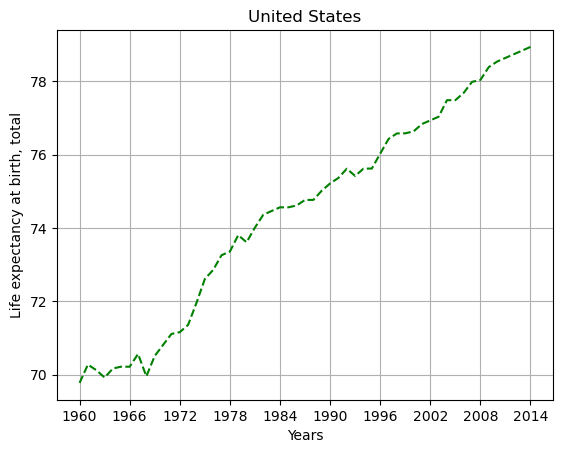

In [44]:
# plot `us_life_expectancy`
plt.plot(np.linspace(1960,2015,56), us_life_expectancy.iloc[0,4:], color='green', linestyle='dashed')
plt.title('United States')
plt.xlabel('Years')
plt.xticks(range(1960,2016,6))
plt.ylabel('Life expectancy at birth, total')

plt.grid()
# plt.show()

plt.savefig('../images/us_life_expectancy.png')

Let's plot 'us_life_expectancy' against 'us_death_rate' on the same plot. For this, we'll need to use `plt` in an object-oriented fashion

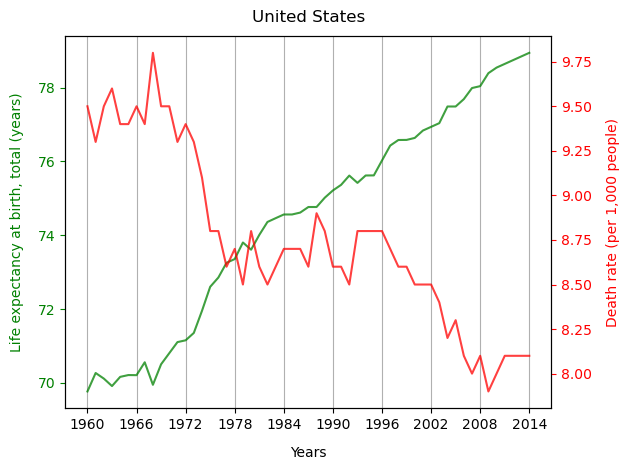

In [45]:
fig, ax0 = plt.subplots()

plt.title('United States', pad=10)
plt.xlabel('Years', labelpad=10)
plt.xticks(np.arange(1960,2016,6))
plt.grid(axis='x')

x = np.linspace(1960,2015,56)

ax0.plot(x, us_life_expectancy.iloc[0,4:], color='green', alpha=0.75)
ax0.set_ylabel('Life expectancy at birth, total (years)', color='green', labelpad=10)
ax0.tick_params(axis='y', colors='green')

ax1 = ax0.twinx()
ax1.plot(x, us_death_rate.iloc[0,4:], color='red', alpha=0.75)
ax1.set_ylabel('Death rate (per 1,000 people)', color='red', labelpad=10)
ax1.tick_params(axis='y', colors='red')

plt.tight_layout()
# plt.show()

plt.savefig('../images/us_life_expectancy_vs_death_rate.png')

To no surprise, US life expectancy has gradually increased since the 1960's. Conversely, the US death rate (per 1,000 people) has seen a gradual decrease since the 1960's.

What about US health expenditure? Is there an inverse correlation between that and the US death rate? Alternatively, is there a positive correlation between US life expectancy and US health expenditure? Let's plot US health expenditure against both to find out.

In [46]:
# return a dataframe where 'Indicator Name' == 'Health expenditure, total (% of GDP)'
us_health_exp_gdp = usa_df[usa_df['Indicator Name'] == 'Health expenditure, total (% of GDP)']
us_health_exp_gdp

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
126,United States,USA,"Health expenditure, total (% of GDP)",SH.XPD.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,15.270043,15.566044,16.02261,16.999143,17.016758,17.057131,17.017361,16.897722,17.140754,NaN


Looks like there are NaN values. Let's check, as usual.

In [47]:
# check for NaN values and sum by column
us_health_exp_gdp.isna().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              1
1961              1
1962              1
1963              1
1964              1
1965              1
1966              1
1967              1
1968              1
1969              1
1970              1
1971              1
1972              1
1973              1
1974              1
1975              1
1976              1
1977              1
1978              1
1979              1
1980              1
1981              1
1982              1
1983              1
1984              1
1985              1
1986              1
1987              1
1988              1
1989              1
1990              1
1991              1
1992              1
1993              1
1994              1
1995              0
1996              0
1997              0
1998              0
1999              0
2000              0
2001              0
2002              0
2003              0
2004              0
2005              0


US health expenditure (GDP) data only dates back to 1995 - 2014. Not ideal, but we can plot this against US death rate. Since the US death rate data goes back to 1960, we'll have to adjust accordingly.

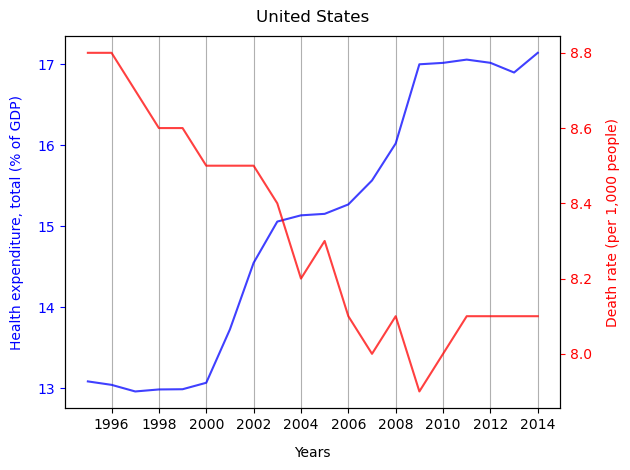

In [48]:
fig, ax0 = plt.subplots()

plt.title('United States', pad=10)
plt.xlabel('Years', labelpad=10)
plt.xticks(np.arange(1994,2016,2))
plt.grid(axis='x')

x = np.linspace(1995,2015,21)

ax0.plot(x, us_health_exp_gdp.iloc[0,39:], color='blue', alpha=0.75)
ax0.set_ylabel('Health expenditure, total (% of GDP)', color='blue', labelpad=10)
ax0.tick_params(axis='y', colors='blue')

ax1 = ax0.twinx()
ax1.plot(x, us_death_rate.iloc[0,39:], color='red', alpha=0.75)
ax1.set_ylabel('Death rate (per 1,000 people)', color='red', labelpad=10)
ax1.tick_params(axis='y', colors='red')

plt.tight_layout()
# plt.show()

plt.savefig('../images/us_health_exp_gdp_vs_death_rate.png')

In [49]:
# return a dataframe where 'Indicator Name' == 'Health expenditure, total (current US$)'
us_health_exp_dollar = usa_df[usa_df['Indicator Name'] == 'Health expenditure, total (current US$)']
us_health_exp_dollar

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
127,United States,USA,"Health expenditure, total (current US$)",SH.XPD.TOTL.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.115800e+12,2.253595e+12,2.358301e+12,2.451062e+12,2.546451e+12,2.646913e+12,2.750543e+12,2.833419e+12,2.985748e+12,NaN


In [50]:
# check for NaN values and sum by column
us_health_exp_dollar.isna().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              1
1961              1
1962              1
1963              1
1964              1
1965              1
1966              1
1967              1
1968              1
1969              1
1970              1
1971              1
1972              1
1973              1
1974              1
1975              1
1976              1
1977              1
1978              1
1979              1
1980              1
1981              1
1982              1
1983              1
1984              1
1985              1
1986              1
1987              1
1988              1
1989              1
1990              1
1991              1
1992              1
1993              1
1994              1
1995              0
1996              0
1997              0
1998              0
1999              0
2000              0
2001              0
2002              0
2003              0
2004              0
2005              0


Looks like US health expenditure ($) also only dates back to 1960. Let's plot this statistic against US death rate only with the data (years) available.

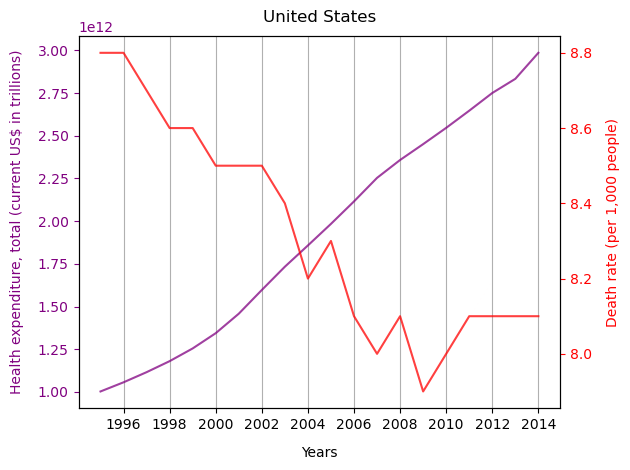

In [51]:
fig, ax0 = plt.subplots()

plt.title('United States', pad=10)
plt.xlabel('Years', labelpad=10)
plt.xticks(np.arange(1994,2016,2))
plt.grid(axis='x')

x = np.linspace(1995,2015,21)

ax0.plot(x, us_health_exp_dollar.iloc[0,39:], color='purple', alpha=0.75)
ax0.set_ylabel('Health expenditure, total (current US$ in trillions)', color='purple', labelpad=10)
ax0.tick_params(axis='y', colors='purple')

ax1 = ax0.twinx()
ax1.plot(x, us_death_rate.iloc[0,39:], color='red', alpha=0.75)
ax1.set_ylabel('Death rate (per 1,000 people)', color='red', labelpad=10)
ax1.tick_params(axis='y', colors='red')

plt.tight_layout()
# plt.show()

plt.savefig('../images/us_health_exp_dollar_vs_death_rate.png')

Lastlym let's see if we have enough data to plot various 'US cause of death' statistics for good measure.

* 'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)'
* 'Cause of death, by injury (% of total)'
* 'Cause of death, by non-communicable diseases (% of total)'

In [52]:
usa_df[usa_df['Indicator Name'] == 'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)'].isna().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              1
1961              1
1962              1
1963              1
1964              1
1965              1
1966              1
1967              1
1968              1
1969              1
1970              1
1971              1
1972              1
1973              1
1974              1
1975              1
1976              1
1977              1
1978              1
1979              1
1980              1
1981              1
1982              1
1983              1
1984              1
1985              1
1986              1
1987              1
1988              1
1989              1
1990              1
1991              1
1992              1
1993              1
1994              1
1995              1
1996              1
1997              1
1998              1
1999              1
2000              0
2001              1
2002              1
2003              1
2004              1
2005              1


In [53]:
usa_df[usa_df['Indicator Name'] == 'Cause of death, by injury (% of total)'].isna().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              1
1961              1
1962              1
1963              1
1964              1
1965              1
1966              1
1967              1
1968              1
1969              1
1970              1
1971              1
1972              1
1973              1
1974              1
1975              1
1976              1
1977              1
1978              1
1979              1
1980              1
1981              1
1982              1
1983              1
1984              1
1985              1
1986              1
1987              1
1988              1
1989              1
1990              1
1991              1
1992              1
1993              1
1994              1
1995              1
1996              1
1997              1
1998              1
1999              1
2000              0
2001              1
2002              1
2003              1
2004              1
2005              1


In [54]:
usa_df[usa_df['Indicator Name'] == 'Cause of death, by non-communicable diseases (% of total)'].isna().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              1
1961              1
1962              1
1963              1
1964              1
1965              1
1966              1
1967              1
1968              1
1969              1
1970              1
1971              1
1972              1
1973              1
1974              1
1975              1
1976              1
1977              1
1978              1
1979              1
1980              1
1981              1
1982              1
1983              1
1984              1
1985              1
1986              1
1987              1
1988              1
1989              1
1990              1
1991              1
1992              1
1993              1
1994              1
1995              1
1996              1
1997              1
1998              1
1999              1
2000              0
2001              1
2002              1
2003              1
2004              1
2005              1


Unfortunately, it looks like there are too many missing values to proceed. 

In conclusion, we can create highly customizable visualizations by leveraging Pandas and Matplotlib. What was demonstrated here was simply a taste!